# MNIST Classification Demo

This notebook demonstrates the usage and performance of three different MNIST classification models:
1. Random Forest (RF)
2. Feed-Forward Neural Network (NN)
3. Convolutional Neural Network (CNN)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from models.classifier import MnistClassifier
from data_utils.data_loader import MNISTDataLoader

# Set random seed for reproducibility
np.random.seed(42)

## 1. Data Loading and Preparation

In [2]:
# Load data
X_train, y_train, X_test, y_test = MNISTDataLoader().load_data()

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (60000, 1, 28, 28)
Test data shape: (10000, 1, 28, 28)


## 2. Model Training and Evaluation

We'll train and evaluate each model, comparing their performance.

In [3]:
def evaluate_model(algorithm, X_train, y_train, X_test, y_test):
    model = MnistClassifier(algorithm=algorithm)
    
    # Train the model
    print(f"Training {algorithm.upper()} model...")
    model.train(X_train=X_train, y_train=y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{algorithm.upper()} Accuracy: {accuracy:.4f}")
    
    return model, y_pred, accuracy

# Evaluate all models
results = {}
for algorithm in ['rf', 'nn', 'cnn']:
    model, y_pred, accuracy = evaluate_model(algorithm, X_train, y_train, X_test, y_test)
    results[algorithm] = {'model': model, 'predictions': y_pred, 'accuracy': accuracy}

Training RF model...
RF Accuracy: 0.9706
Training NN model...
NN Accuracy: 0.9846
Training CNN model...
CNN Accuracy: 0.9946


## 3. Performance Comparison

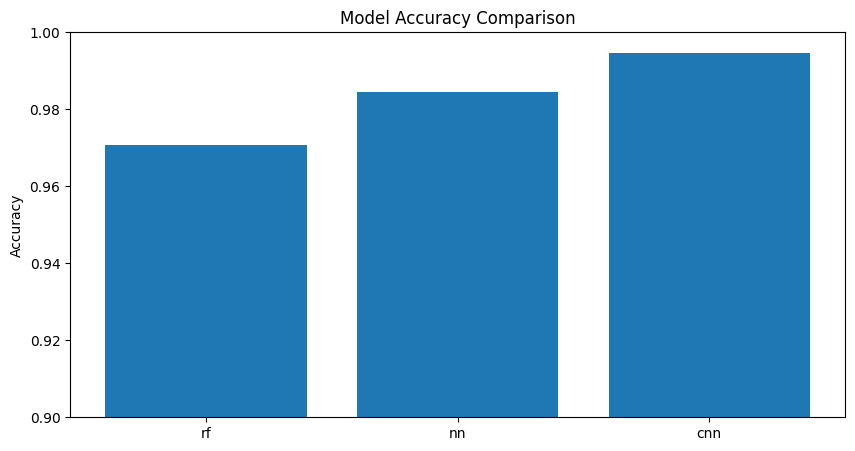

In [6]:
# Plot accuracy comparison
plt.figure(figsize=(10, 5))
algorithms = list(results.keys())
accuracies = [results[alg]['accuracy'] for alg in algorithms]

plt.bar(algorithms, accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)  # Focus on the relevant range
plt.show()

## 4. Analysis of Correct and Incorrect Predictions

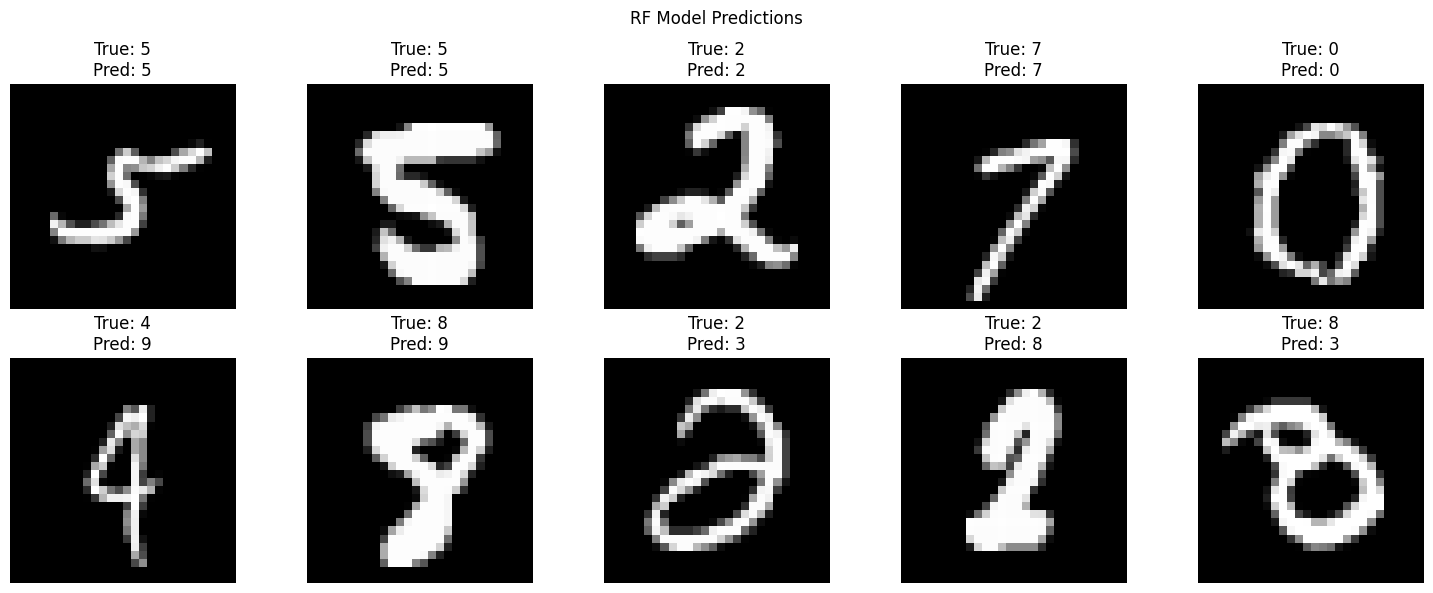

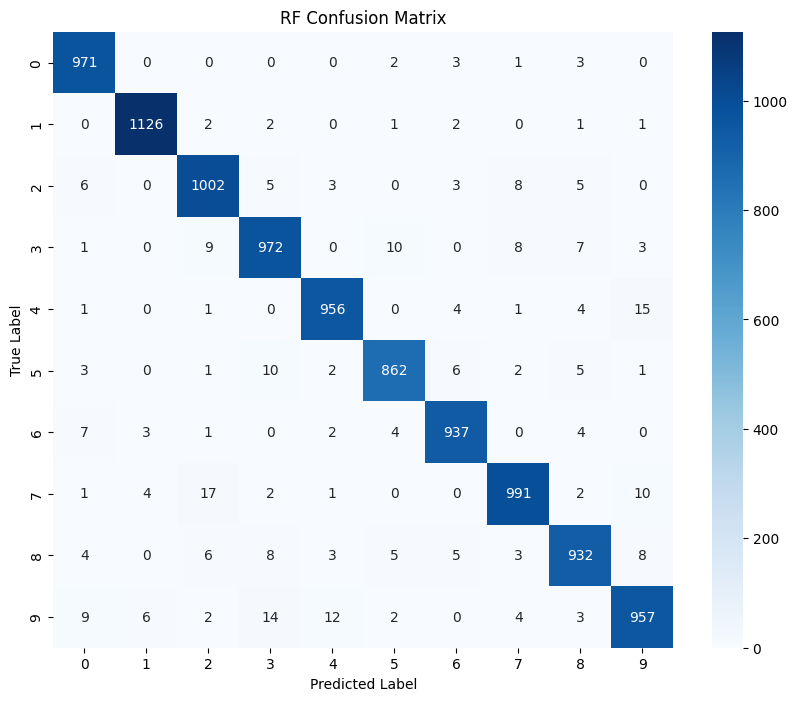

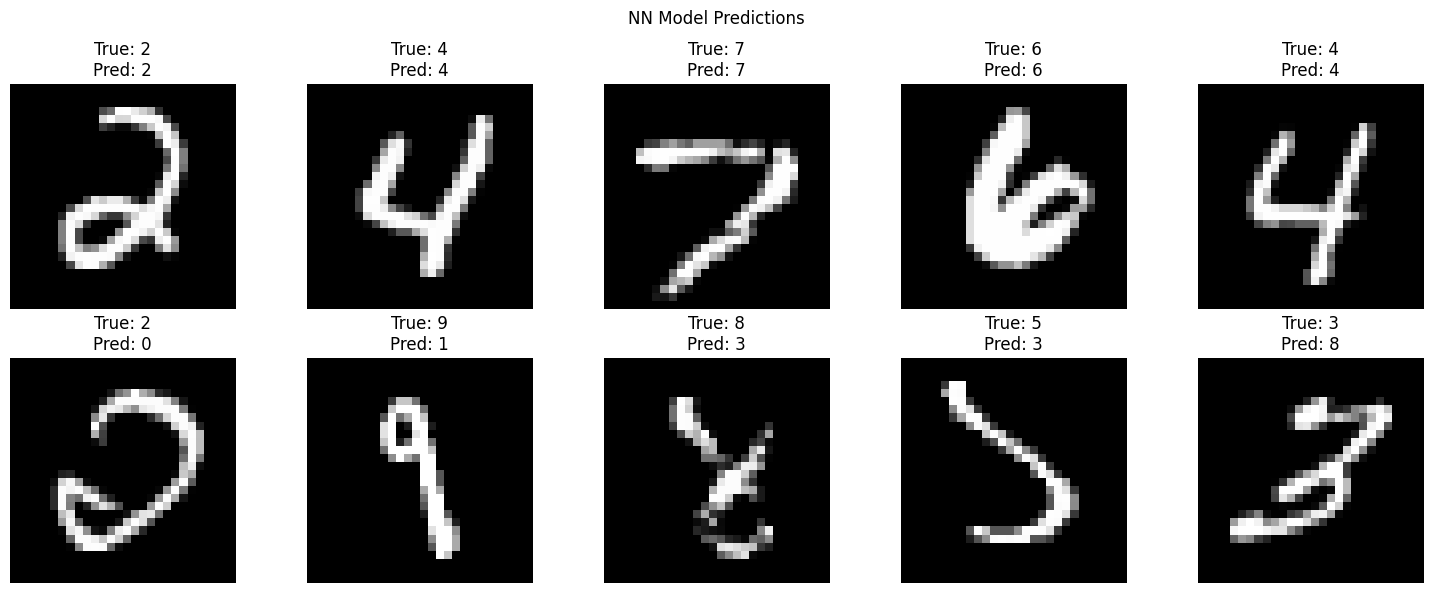

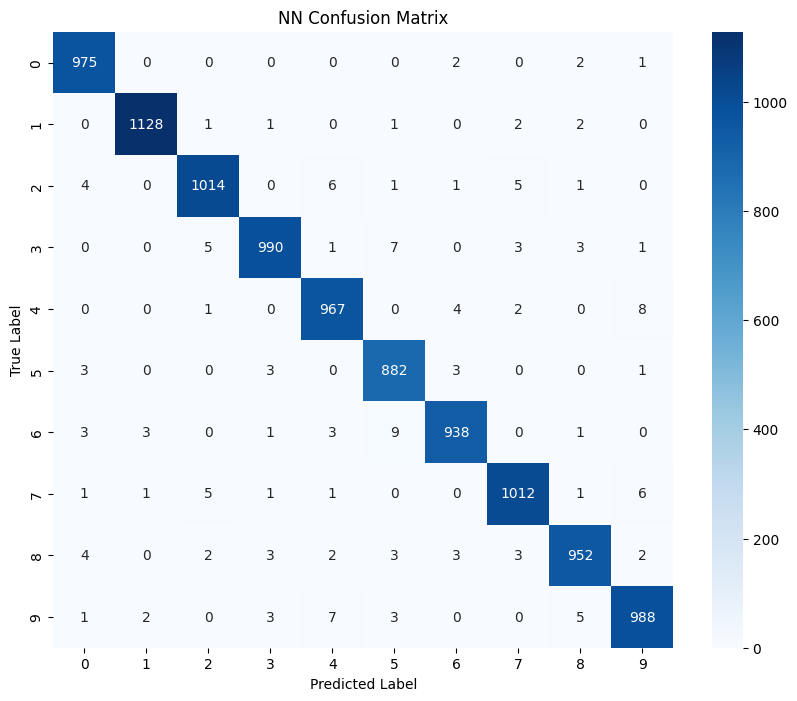

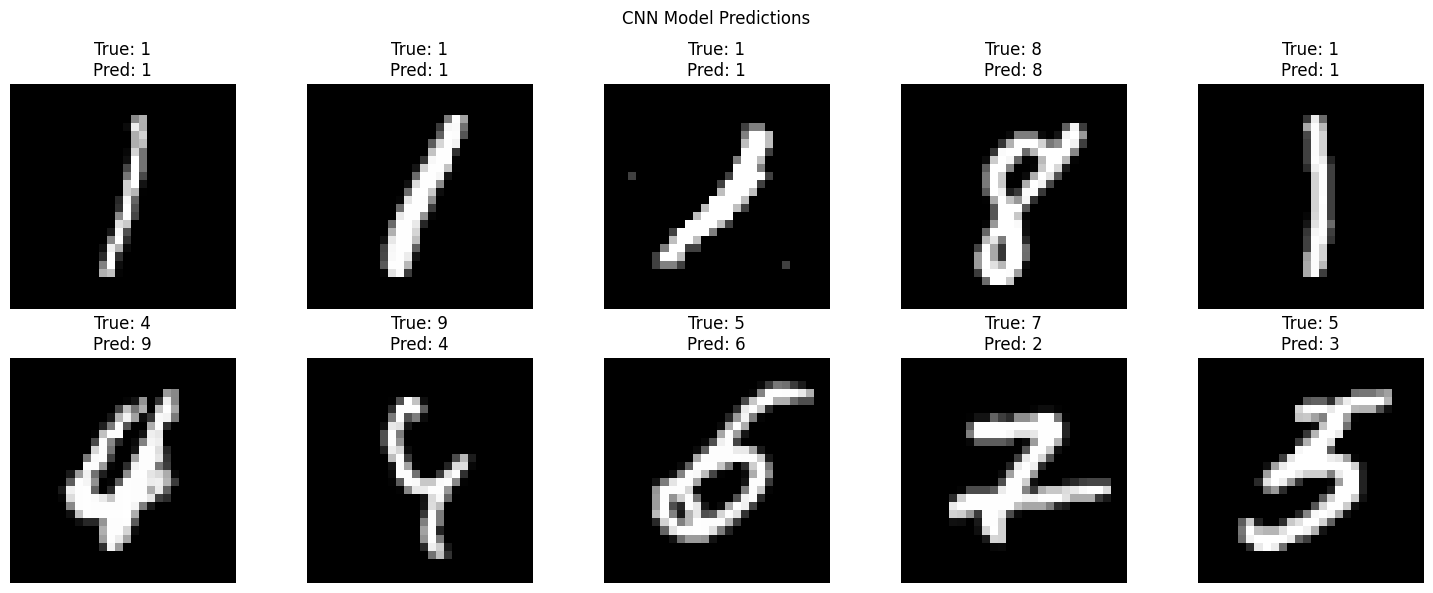

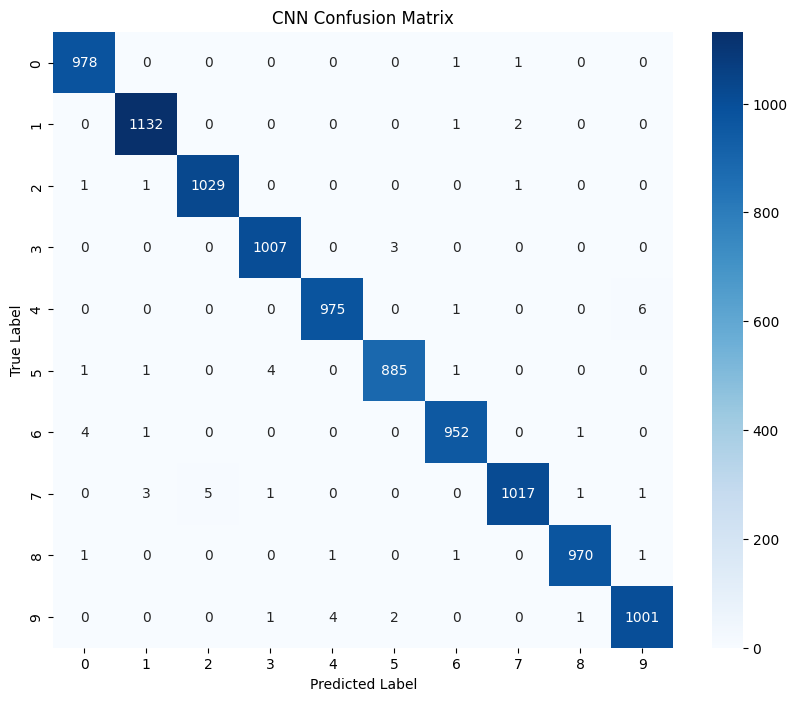

In [7]:
def plot_predictions(X_test, y_test, y_pred, title, n_samples=5):
    # Find correct and incorrect predictions
    correct = np.where(y_test == y_pred)[0]
    incorrect = np.where(y_test != y_pred)[0]
    
    # Sample images
    correct_samples = np.random.choice(correct, n_samples, replace=False)
    incorrect_samples = np.random.choice(incorrect, n_samples, replace=False)
    
    fig, axes = plt.subplots(2, n_samples, figsize=(15, 6))
    fig.suptitle(title)
    
    # Plot correct predictions
    for i, idx in enumerate(correct_samples):
        axes[0, i].imshow(X_test[idx].reshape(28, 28), cmap='gray')
        axes[0, i].axis('off')
        axes[0, i].set_title(f'True: {y_test[idx]}\nPred: {y_pred[idx]}')
    
    # Plot incorrect predictions
    for i, idx in enumerate(incorrect_samples):
        axes[1, i].imshow(X_test[idx].reshape(28, 28), cmap='gray')
        axes[1, i].axis('off')
        axes[1, i].set_title(f'True: {y_test[idx]}\nPred: {y_pred[idx]}')
    
    plt.tight_layout()
    plt.show()

# Analyze predictions for each model
for algorithm in results:
    y_pred = results[algorithm]['predictions']
    plot_predictions(X_test, y_test, y_pred, f"{algorithm.upper()} Model Predictions")
    
    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{algorithm.upper()} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()